In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_death = pd.read_csv("../data/orszagos_halott.csv", sep=',')[:755]
all_inf = pd.read_csv("../data/orsz_fert.csv", sep=';')[:755]

In [3]:
death = np.array(all_death[181:181+160]["Hétnapos mozgóátlag"])
inf = np.array([s.replace(',', '') for s in all_inf[181:181+160]["Hétnapos mozgóátlag"]], dtype=np.float32)

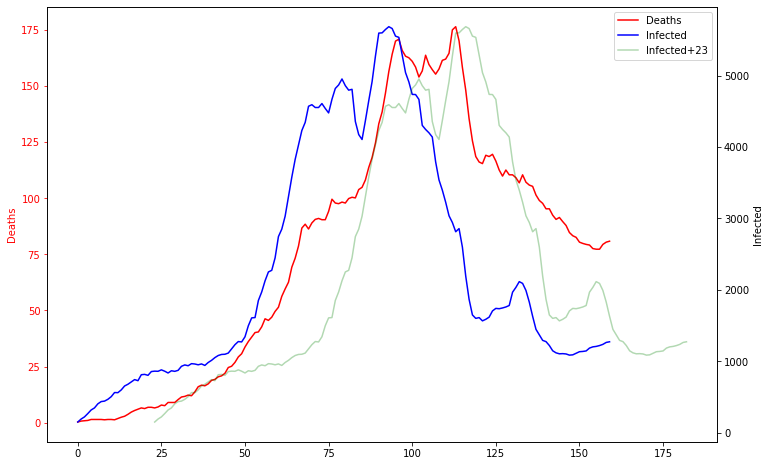

In [4]:
fig = plt.figure(figsize=(12,8))

x = np.array(list(range(160)))
ax = fig.add_subplot(111)
lns1 = ax.plot(x, death, label="Deaths", c = 'r')
ax.set_ylabel("Deaths", c='r')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='y', colors='red')

ax2 = plt.gca().twinx()
lns2 = ax2.plot(x, inf, c="b", label="Infected")
lns3 = ax2.plot(x+23, inf, c="g", label="Infected+23", alpha=0.3)
ax2.set_ylabel("Infected")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

In [5]:
df = pd.read_csv("../data/HU_settlement_tempinfo.csv", sep=";")

In [13]:
df.columns[182:182+150]

Index(['9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20',
       ...
       '1/20/21', '1/21/21', '1/22/21', '1/23/21', '1/24/21', '1/25/21',
       '1/26/21', '1/27/21', '1/28/21', '1/29/21'],
      dtype='object', length=150)

In [14]:
df["9/1/20"].sum(), df["9/2/20"].sum(), df["9/3/20"].sum(), df["9/4/20"].sum()

(732.0, 600.0, 918.0, 1020.0)

In [24]:
df

,Settlement,3/4/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,...,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,Allinfected
0,Aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,187
1,Abádszalók,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,3.0,NaN,127
2,Abaliget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3,Abasár,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,165
4,Abaújalpár,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,Zsira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208
3099,Zsombó,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,98
3100,Zsujta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3101,Zsurk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


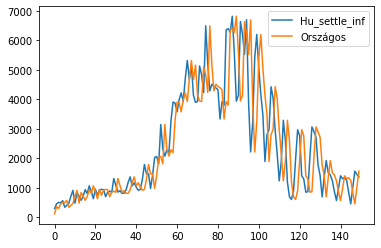

In [29]:
arr = [df[col][:-1].sum() for col in df.columns[182:182+150]]
inf1 = np.array(all_inf["Az új fertőzöttek számának napi alakulása Magyarországon"][181:181+150].array)

x = np.array(list(range(150)))
plt.plot(x,arr, label="Hu_settle_inf")
plt.plot(x,inf1[:150], label="Országos")
plt.legend()

<PandasArray>
[ 118.0,  365.0,  301.0,  459.0,  510.0,  495.0,  576.0,  341.0,  411.0,
  476.0,
 ...
 2853.0, 3093.0, 2995.0, 2912.0, 2623.0, 1628.0, 2855.0, 4385.0, 4668.0,
 4948.0]
Length: 180, dtype: float64

In [28]:
all_inf[181:]

,Dátum,Az új fertőzöttek számának napi alakulása Magyarországon,Hétnapos mozgóátlag
181,2020-09-01,118.0,148.85714290
182,2020-09-02,365.0,190.57142860
183,2020-09-03,301.0,220.57142860
184,2020-09-04,459.0,267.28571430
185,2020-09-05,510.0,317.57142860
...,...,...,...
711,2022-02-13,NaN,NaN
712,2022-02-14,21081.0,"9,501.42857100"
713,2022-02-15,4411.0,"9,124.00000000"
714,2022-02-16,8883.0,"8,402.71428600"
